In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("sample/bds_hn_data_cleaned.csv")
df.info()
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3130 entries, 0 to 3129
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   published_date  3130 non-null   object 
 1   location        3130 non-null   object 
 2   home_type       3130 non-null   object 
 3   price           3130 non-null   float64
 4   area            3130 non-null   float64
 5   bedroom         3130 non-null   float64
 6   wc              3130 non-null   float64
 7   legal_status    3130 non-null   object 
 8   furniture       3130 non-null   object 
dtypes: float64(4), object(5)
memory usage: 220.2+ KB


,price,area,bedroom,wc
count,3130.000000,3130.000000,3130.000000,3130.000000
mean,15.509927,89.218054,2.840575,2.650799
std,15.341707,56.088153,1.793907,1.754993
min,0.016300,1.000000,0.000000,0.000000
25%,6.600000,50.000000,2.000000,2.000000
50%,11.000000,75.000000,3.000000,3.000000
75%,17.900000,108.000000,4.000000,3.000000
max,99.000000,340.000000,9.000000,14.000000


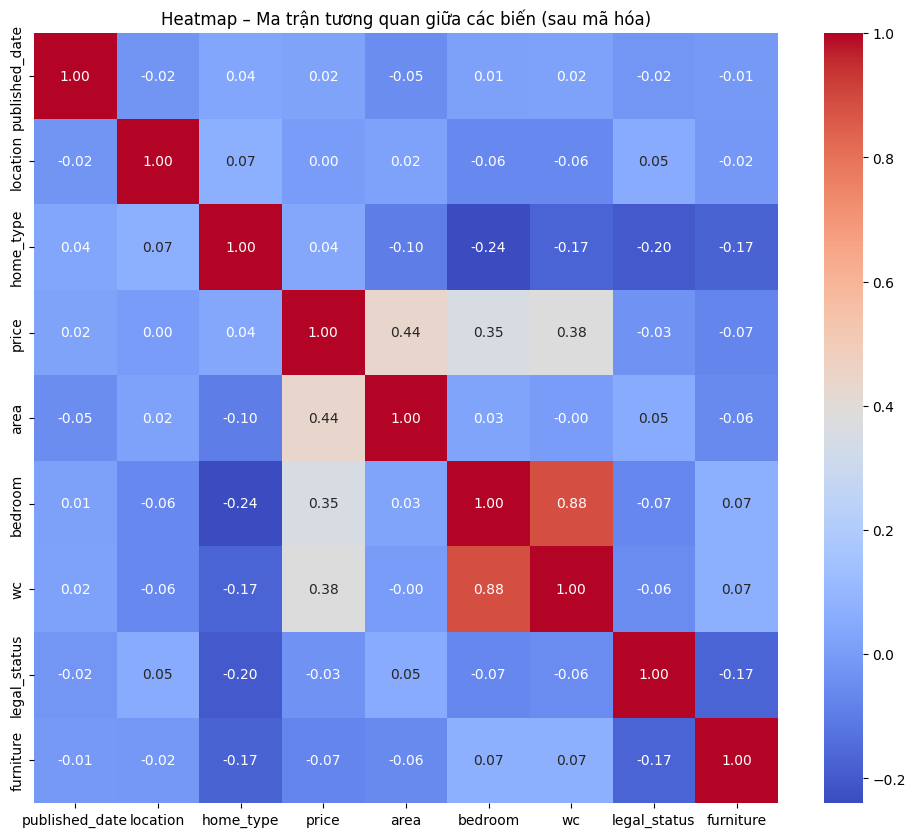

In [17]:
from sklearn.preprocessing import LabelEncoder

for col in df.select_dtypes(exclude=["number"]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Heatmap – Ma trận tương quan giữa các biến (sau mã hóa)")
plt.show()


In [18]:
corr_price = df.corr()["price"].sort_values(ascending=False)
corr_price


price             1.000000
area              0.437006
wc                0.381084
bedroom           0.354150
home_type         0.039490
published_date    0.022023
location          0.000663
legal_status     -0.029656
furniture        -0.071504
Name: price, dtype: float64

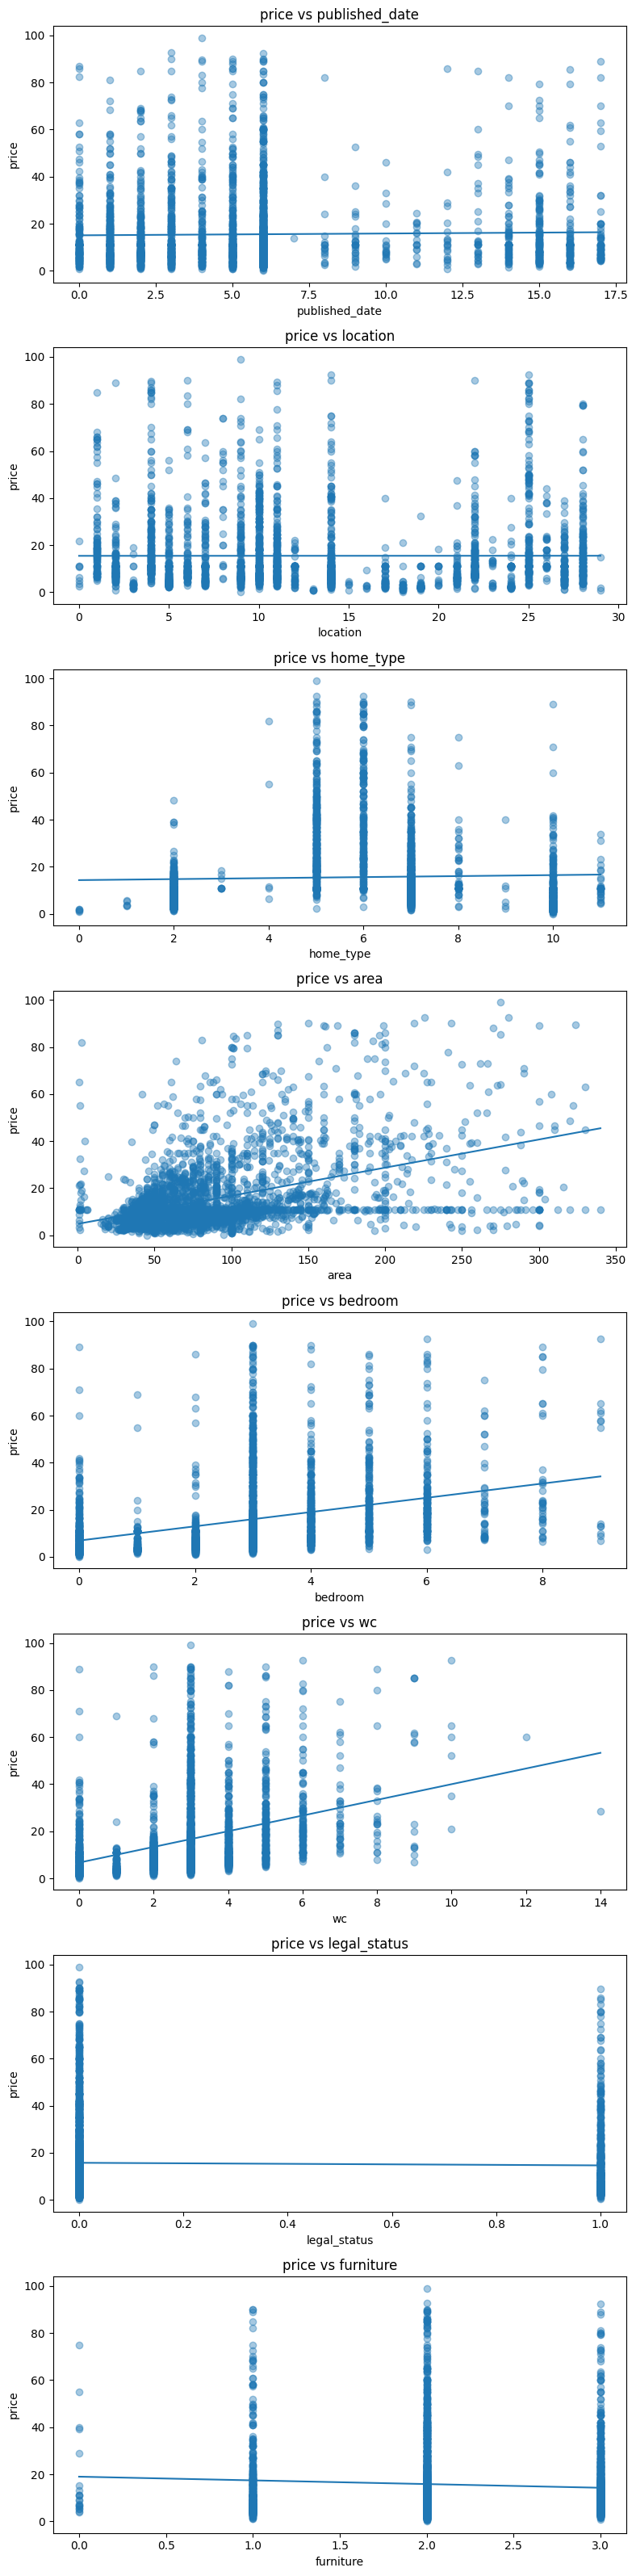

price             1.000000
area              0.437006
wc                0.381084
bedroom           0.354150
home_type         0.039490
published_date    0.022023
location          0.000663
legal_status     -0.029656
furniture        -0.071504
Name: price, dtype: float64

In [19]:
# Scatter plot Price vs từng biến số (matplotlib only)

import numpy as np

numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
numeric_cols = [c for c in numeric_cols if c != 'price']

fig, axes = plt.subplots(
    nrows=len(numeric_cols),
    ncols=1,
    figsize=(8, 4 * len(numeric_cols))
)

# nếu chỉ có 1 biến numeric ngoài price thì axes không phải list, ta chuyển nó thành list
if len(numeric_cols) == 1:
    axes = [axes]

for ax, col in zip(axes, numeric_cols):
    # scatter plot
    ax.scatter(df[col], df['price'], alpha=0.4)
    ax.set_xlabel(col)
    ax.set_ylabel('price')
    ax.set_title(f'price vs {col}')

    # fit đường tuyến tính y = a*x + b
    x = df[col].values
    y = df['price'].values

    # loại NaN để tránh lỗi polyfit
    mask = ~np.isnan(x) & ~np.isnan(y)
    if mask.sum() > 1:
        a, b = np.polyfit(x[mask], y[mask], 1)
        x_line = np.linspace(x[mask].min(), x[mask].max(), 100)
        y_line = a * x_line + b
        ax.plot(x_line, y_line)

plt.tight_layout()
plt.show()

# Bảng hệ số tương quan Pearson giữa price và từng biến số
corr_to_price = df.corr(numeric_only=True)['price'].sort_values(ascending=False)
corr_to_price


